<p>Program zur Auswertung der erhobenen Messdaten</p>
<p>Vor der Bedienung zunächst die ersten beiden Blöcke kompilieren! Anschließend müssen in Block 3 die Namen der .txt Dateien in einer Liste angegeben werden. In der gleichen Reihenfolge wie bei den .txt Dateien werden nun die zugehörigen Abstände in einer weiteren Liste als floats/integers angegeben. Zuletzt wird noch der Name der zu erstellenden Datei angegeben. Fertig!</p>
<p>Mit den Argumenten "xscale" und "yscale" kann die Skalierung der Achsen gewählt werden. Das Argument "papier" ist nötig um den Titel anzupassen. Hier wird die Körnung des verwendeten Papiers eingesetzt.</p>
<p>Weitere Funktionen für die Winkelgeschwindigkeit werden noch Folgen. Ansonsten darf natürlcih auch einer von euch hier weitere Funktionen erstellen.</p>


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#fuctions
def create_index(dataframe, spacing):
    L1 = [spacing*c for c in range(len(dataframe.index))]
    index = pd.DataFrame({"Position":L1})
    temp = pd.concat([index, dataframe], axis=1)
    temp.set_index("Position", inplace=True)
    return temp

def time_diff(dataframe):
    L2 = [dataframe["Time"][c+1]-dataframe["Time"][c] for c in range(0, len(dataframe.index)-1)]
    L2 = [np.nan] + L2
    diff = pd.DataFrame({"Time Diff.":L2})
    return pd.concat([dataframe, diff], axis=1)

def array_velocity(dataframe, space):
    L = [(space/c) for c in dataframe["Time Diff."]]
    vel = pd.DataFrame({"Array Vel.":L})
    return pd.concat([dataframe, vel], axis=1)

#def approx_angularvel(dataframe, space):
    #lamb = space - h(in cm)
    #psi = np.sin(lamb/L(in cm))
    #L = [psi/c for c in dataframe["Time  Diff."]]
    #L = [np.nan] + L
    #angvel = pd.DataFrame({"Angular Vel.":L})
    #return pd.concat([dataframe, vel], axis=1)

def compute(dataframe, spacing):
    dataframe = time_diff(dataframe)
    dataframe = array_velocity(dataframe, spacing)
    #dataframe = approx_angularvel(dataframe, spacing)
    #more code
    return create_index(dataframe, spacing)

def plot_arrayvel(frames, spacings, filename, xscale, yscale, papier):
    for k in range(len(spacings)):
        plt.scatter(frames[k].index, frames[k]["Array Vel."], label="d="+str(spacings[k]), marker=str(k+1), s=20)
    plt.xlabel("Position x [cm]")
    plt.ylabel("V [cm/s]")
    plt.title(str(papier)+"er Papier, Transversalgeschwindigkeit v für verschiedene Abstände d")
    plt.legend()
    plt.axis(xscale + yscale)
    plt.grid(True)
    plt.savefig(filename, dpi=1000)
    
def get_data(filenames, spacings):
    frames = [pd.read_csv(c) for c in filenames]
    L = []
    for k in range(len(filenames)):
        L.append(compute(frames[k], spacings[k]))
    return L

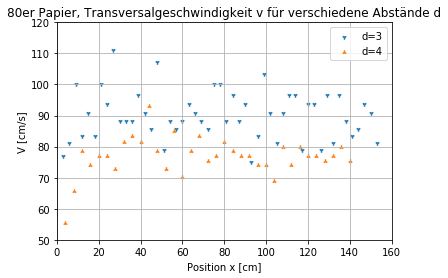

In [21]:
files = ["80_03.txt", "80_04.txt"]
spaces = [3, 4]
filename = "Plot1.jpg"

plot_arrayvel(get_data(files, spaces), spaces, filename, xscale=[0,160], yscale=[50, 120], papier=80)